# Tweets Sentiment Analysis

## Goal 
The goal of this project is to give you a first approach to NLP. You will try to preprocess
text data and train different classifiers trying to solve a classification task with the best
possible score.

## Task
In this project, you will work on sentiment analysis of tweets. You will need to predict whether a tweet is positive, negative, or neutral.

* Data preparation. Transform tweets into vectors using different approaches.

* Similarity. Find the top-10 most similar pair of tweets using datasets with different preprocessing.

* Machine learning. Using different machine learning algorithms and different datasets with different preprocessing conduct sentiment analysis

# Import necessary modules

In [ ]:
import os
import string
import time
import datetime
from collections import Counter #, defaultdict


import pandas as pd
import numpy as np


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder # , LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split


from xgboost import XGBClassifier


import nltk
from nltk import word_tokenize #, sent_tokenize
from nltk.stem import LancasterStemmer #, PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob
!pip install spellchecker #pyspellchecker
!pip install pyspellchecker
from spellchecker import SpellChecker
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')


import seaborn as sns
import matplotlib.pylab as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from joblib import dump, load

import warnings
warnings.filterwarnings("ignore")

from gensim.models import word2vec
import gensim.downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.9 MB 5.0 MB/s 
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966515 sha256=064de33ed970db597b351ebed32f0bf28a6146803dec145068cf5307dc1a84da
  Stored in directory: /root/.cache/pip/wheels/58/e9/48/b82b733a7a0a9cc52ed239ccf082ff33e2fbda71670ddd3349
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7141 sha256=1c0790175fb7deb6a4d835886b0765dc60c8000954d017a736e0bc78b65031e8
  Stored in directory: /root/.cache/pip/wheels/3c/f3/5d/77e8983e86af1c3c62b80d76de8020f560ce6367f1b2763b40
  Created wheel for silpa-common: filename=silpa_common-0.3-py3-none-any.whl size=8483 sha256=8ee5f1c9f80681af173ab0b9948f3ebc12a42eee0c5bed67fa959a20e95639ab
  Stored in directory: /root/.cache/pip/wheels/02/81/11/40ef1cf40f5c4021a214653ca3362914f0f9e14e8322f75f9b
  Created wheel for soundex: filename=s

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## Congifurate your dataset and models

In [ ]:
#config.py
path_main = '/content/drive/MyDrive/Roadto12/tweets'
params = {
    #for test
    # 'test': {
    #         'coder': 'one_hot',
    #         'stemming': True,
    #         'lemmatization': False,
    #         'misspellings': False,
    #         'stop_words': True,
    #         'punctuation': True,
    #         'lower_case': True,
    #         'description': 'testing',
    #         'chose_example': None
    #     },
    # one_hot
    '00': {
        'coder': 'one_hot',
        'stemming': False,
        'lemmatization': False,
        'misspellings': False,
        'stop_words': True,
        'punctuation': True,
        'lower_case': True,
        'chose_example': None,
        'description': '0 or 1, if the word exist + just tokenization',
    },
    '01': {
        'coder': 'one_hot',
        'stemming': True,
        'lemmatization': False,
        'misspellings': False,
        'stop_words': True,
        'punctuation': True,
        'lower_case': True,
        'chose_example': None,
        'description': '0 or 1, if the word exist + stemming',
    },
    '02': {
        'coder': 'one_hot',
        'stemming': False,
        'lemmatization': True,
        'misspellings': False,
        'stop_words': True,
        'punctuation': True,
        'lower_case': True,
        'chose_example': None,
        'description': '0 or 1, if the word exist + lemmatization'
    },
    '03': {
        'coder': 'one_hot',
        'stemming': True,
        'lemmatization': False,
        'misspellings': True,
        'stop_words': True,
        'punctuation': True,
        'lower_case': True,
        'chose_example': None,
        'description': '0 or 1, if the word exist + stemming + misspellings'
    },
    '04': {
        'coder': 'one_hot',
        'stemming': False,
        'lemmatization': True,
        'misspellings': True,
        'chose_example': None,
        'stop_words': True,
        'punctuation': True,
        'lower_case': True,
        'description': '0 or 1, if the word exist + lemmatization + misspellings'
    },
    # '05': {
    #     'coder': 'one_hot',
    #     'stemming': True,
    #     'lemmatization': True,
    #     'misspellings': True,
    #     'chose_example': None,
    #     'stop_words': True,
    #     'punctuation': True,
    #     'lower_case': True,
    #     'description': '0 or 1, if the word exist + any other ideas of preprocessing'
    # },

    # bag_of_words
    '10': {
        'coder': 'bag_of_words',
        'stemming': False,
        'lemmatization': False,
        'misspellings': False,
        'chose_example': None,
        'stop_words': True,
        'punctuation': True,
        'lower_case': True,
        'description': 'bag_of_words + just tokenization',
    },
    '11': {
        'coder': 'bag_of_words',
        'stemming': True,
        'lemmatization': False,
        'chose_example': None,
        'misspellings': False,
        'stop_words': True,
        'punctuation': True,
        'lower_case': True,
        'description': 'bag_of_words + stemming',
    },
    '12': {
        'coder': 'bag_of_words',
        'stemming': False,
        'lemmatization': True,
        'chose_example': None,
        'misspellings': False,
        'stop_words': True,
        'punctuation': True,
        'lower_case': True,
        'description': 'bag_of_words + lemmatization'
    },
    '13': {
        'coder': 'bag_of_words',
        'stemming': True,
        'lemmatization': False,
        'misspellings': True,
        'chose_example': None,
        'stop_words': True,
        'punctuation': True,
        'lower_case': True,
        'description': 'bag_of_words + stemming + misspellings'
    },
    '14': {
        'coder': 'bag_of_words',
        'stemming': False,
        'lemmatization': True,
        'misspellings': True,
        'chose_example': None,
        'stop_words': True,
        'punctuation': True,
        'lower_case': True,
        'description': 'bag_of_words + lemmatization + misspellings'
    },
    # '15': {
    #     'coder': 'bag_of_words',
    #     'stemming': True,
    #     'chose_example': None,
    #     'lemmatization': True,
    #     'misspellings': True,
    #     'stop_words': True,
    #     'punctuation': True,
    #     'lower_case': True,
    #     'description': 'bag_of_words + any other ideas of preprocessing'
    # },

    # tfidf
    '20': {
        'coder': 'tfidf',
        'stemming': False,
        'lemmatization': False,
        'misspellings': False,
        'stop_words': True,
        'punctuation': True,
        'lower_case': True,
        'chose_example': None,
        'description': 'TFIDF + just tokenization',
    },
    '21': {
        'coder': 'tfidf',
        'stemming': True,
        'lemmatization': False,
        'misspellings': False,
        'stop_words': True,
        'punctuation': True,
        'lower_case': True,
        'chose_example': None,
        'description': 'TFIDF + stemming',
    },
    '22': {
        'coder': 'tfidf',
        'stemming': False,
        'lemmatization': True,
        'misspellings': False,
        'stop_words': True,
        'punctuation': True,
        'lower_case': True,
        'chose_example': None,
        'description': 'TFIDF + lemmatization'
    },
    '23': {
        'coder': 'tfidf',
        'stemming': True,
        'lemmatization': False,
        'misspellings': True,
        'stop_words': True,
        'punctuation': True,
        'lower_case': True,
        'chose_example': None,
        'description': 'TFIDF + stemming + misspellings'
    },
    '24': {
        'coder': 'tfidf',
        'stemming': False,
        'lemmatization': True,
        'chose_example': None,
        'misspellings': True,
        'stop_words': True,
        'punctuation': True,
        'lower_case': True,
        'description': 'TFIDF + lemmatization + misspellings'
    },
    # '25': {
    #     'coder': 'tfidf',
    #     'stemming': False,
    #     'lemmatization': True,
    #     'misspellings': True,
    #     'stop_words': True,
    #     'punctuation': True,
    #     'lower_case': True,
    #     'chose_example': None,
    #     'description': 'TFIDF + any other ideas of preprocessing'
    # },
}

models = {
        LogisticRegression:
            {
                'param_grid':
                    {
                        'penalty': ['l2'],
                        'C': [0.01, 0.1, 1,], # 0.5, 1, 2
                        'max_iter': [25, 50, 100], # 100, 200
                        'multi_class': ['ovr', ],
                    },
            },
        DecisionTreeClassifier:
            {
                'param_grid': {
                    'criterion': ['gini', 'entropy', 'log_loss'], #'entropy', 'log_loss'
                    'max_depth': [3, 5, 10], #20, 30
                    'min_samples_split': [2, 4, 6], #4, 6
                    'min_samples_leaf': [1, 3, 5] #3, 5
                }
            },
        # RandomForestClassifier:
        #     {
        #         'param_grid': {
        #             "n_estimators": [50, 100, 200, 300], #
        #             "criterion": ['gini'], #'entropy', 'log_loss'
        #             "max_depth": [3, 4, 6], #20, 30
        #             'min_samples_split': [2, 4, 6], #4, 6
        #             'min_samples_leaf': [1,3, 5], #3, 5
        #         }
        #     },
        # GradientBoostingClassifier:
        #     {
        #         'param_grid':
        #             {
        #                 "loss": ["log_loss", 'deviance', 'exponential'], #'deviance', 'exponential'
        #                 "learning_rate" : [0.1, 0.05, 0.01],
        #                 "n_estimators" : [100, 200, 300],
        #                 "min_samples_split": [2, 4, 6],#
        #                 "min_samples_leaf": [1, 3, 5],  #
        #                 "max_depth": [3, 6, 9],  #
        #                 "n_iter_no_change": [3,],  #
        #             }
        #     },
        XGBClassifier:
            {
                'param_grid': {
                    'max_depth': [6, ],
                    'n_estimators': [300], #, 200, 100
                    'learning_rate': [1e-3, ], # 1e-5, 1e-1
                }
            },
}


# Preprocessing Data

### Example

In [ ]:
path_tmp = '/content/drive/MyDrive/Roadto12/tweets/p00_tweets'
df_negative_tmp = pd.read_csv(os.path.join(path_tmp, 'processedNegative.csv')).T
df_neutral_tmp = pd.read_csv(os.path.join(path_tmp, 'processedNeutral.csv')).T
df_positive_tmp = pd.read_csv(os.path.join(path_tmp, 'processedPositive.csv')).T

In [ ]:
df_negative_tmp.head()

""
How unhappy some dogs like it though
talking to my over driver about where I'm goinghe said he'd love to go to New York too but since Trump it's probably not
Does anybody know if the Rand's likely to fall against the dollar? I got some money I need to change into R but it keeps getting stronger unhappy
I miss going to gigs in Liverpool unhappy
There isnt a new Riverdale tonight ? unhappy


In [ ]:
df_neutral_tmp.head()

""
Pak PM survives removal scare
but court orders further probe into corruption charge.
Supreme Court quashes criminal complaint against cricketer for allegedly depicting himself as on magazine cover.
Art of Living's fights back over Yamuna floodplain damage
livid.


In [ ]:
df_positive_tmp.head()

""
An inspiration in all aspects: Fashion
fitness
beauty and personality. :)KISSES TheFashionIcon
Apka Apna Awam Ka Channel Frankline Tv Aam Admi Production Please Visit Or Likes Share :)Fb Page :...
Beautiful album from the greatest unsung guitar genius of our time - and I've met the great backstage


(1186, 1) (1117, 1) (1570, 1)
(3873, 2)


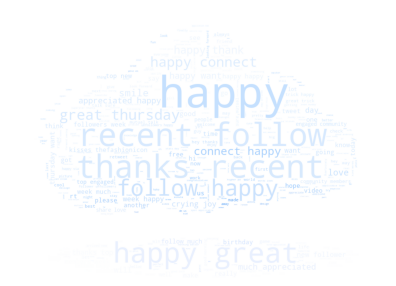

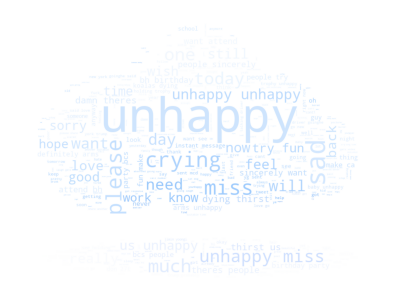

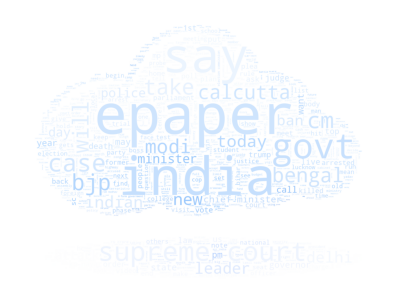

In [ ]:
df_positive_tmp['label'] = 0
df_negative_tmp['label'] = 1
df_neutral_tmp['label'] = 2
print(df_positive_tmp.shape, df_negative_tmp.shape, df_neutral_tmp.shape)
df_tmp = pd.concat([df_positive_tmp,df_neutral_tmp, df_negative_tmp])
df_tmp.reset_index(inplace=True)
# df.columns = ['tweet', 'label']
print(df_tmp.shape)
#Wordcloud
def create_wordcloud(df, path):
  img_coloring = np.array(Image.open(path))
  text = " ".join([text.lower().rstrip().lstrip() for text in df.index])
  wordcloud = WordCloud(background_color="white", width=2000, height=500, 
                        max_words=1000, repeat=False, mask=img_coloring).generate(text)
  image_colors = ImageColorGenerator(img_coloring)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud.recolor(color_func=image_colors))
  plt.axis("off")
  plt.show()
  print("\n")

for dfr in [df_positive_tmp, df_negative_tmp, df_neutral_tmp]:
  create_wordcloud(dfr, path=os.path.join(path_main, 'the-cloud.jpg'))

## Try different approaches to preprocessing and preparation text data

In [ ]:

C_GREEN = "\033[32m "
C_BLUE = "\033[34m "
C_RED = "\033[31m "
C_WHITE = "\033[37m "
C_YELLOW = "\033[33m "
C_END = " \033[0m"


class Preprocessing:
    def __init__(self, path_data: str = './data/', params: dict = None):
        self.docs_list = None
        self.vector_columns = None
        self.path_data = path_data
        self.encoding = None
        self.stemm = None
        self.lemm = None
        self.miss = None
        self.punct = None
        self.stop_words = None
        self.descr = None
        self.lower = None
        self.nbr_ex = None
        if params:
            self.params = params
            if params['coder']:
                self.encoding = params['coder']  # one_hot or bag_of_words or tfidf
            if params['stemming']:
                self.stemm = params['stemming']
            if params['lemmatization']:
                self.lemm = params['lemmatization']
            if params['misspellings']:
                self.miss = params['misspellings']
            if params['punctuation']:
                self.punct = params['punctuation']
            if params['stop_words']:
                self.stop_words = params['stop_words']
            if params['description']:
                self.descr = params['description']
            if params['lower_case']:
                self.lower = params['lower_case']
            if params['chose_example']:
                self.nbr_ex = params['chose_example']
        self.df = None
        self.vector = None
        self.corpus = None
        self.corpus_counter = None

    def _time_execution(func_name):
        def print_time(self, *args):
            start_time = time.time()
            func_name(self, *args)
            end_time = time.time()
            print(f"{C_RED}Elapsed time during the whole {func_name.__name__} in seconds: {C_END}", end_time-start_time)
        return print_time

    def _print_decorator(func_name):
        def print_example(self, *args):
            if isinstance(self.nbr_ex, int) and 0 <= self.nbr_ex < self.df.shape[0]:
                print(f"{C_BLUE}Before {func_name.__name__}: {C_END}", self.df.iloc[self.nbr_ex, 2])
            # print(f"{when} {name}: ", )
            start_time = time.time()
            func_name(self, *args)
            if isinstance(self.nbr_ex, int) and 0 <= self.nbr_ex < self.df.shape[0]:
                print(f"{C_GREEN}After {func_name.__name__}: {C_END}", self.df.iloc[self.nbr_ex, 2])
            end_time = time.time()
            print(f"{C_RED}Elapsed time during the whole {func_name.__name__} in seconds: {C_END}", end_time-start_time)
        return print_example

    @_print_decorator
    def run_tokenazation(self):
        self.df.iloc[:, 2] = self.df.iloc[:, 2].agg(word_tokenize)

    @_print_decorator
    def run_stemming(self, stemmer=LancasterStemmer):
        self.df.iloc[:, 2] = self.df.iloc[:, 2].agg(lambda text: [stemmer().stem(word) for word in text])

    @_print_decorator
    def run_lemmatization(self, lemmatize=WordNetLemmatizer):
        self.df.iloc[:, 2] = self.df.iloc[:, 2].agg(lambda text: [lemmatize().lemmatize(word) for word in text])

    @_print_decorator
    def run_punctuation(self):
        self.df.iloc[:, 2] = self.df.iloc[:, 2].agg(lambda text: ["".join([c for c in word
                                                                           if (c in string.ascii_letters)
                                                                           # or (c in string.digits)
                                                                           or (c in string.whitespace)])
                                                                  for word in text])
        self.df.iloc[:, 2] = self.df.iloc[:, 2].agg(lambda text: [word for word in text
                                                                  if word.isalpha()])

    @_print_decorator
    def run_lower_case(self):
        self.df.iloc[:, 2] = self.df.iloc[:, 2].agg(lambda text: [word.lower() for word in text])

    @_print_decorator
    def run_misspellings(self):
        spell = SpellChecker()
        self.df.iloc[:, 2] = self.df.iloc[:, 2].agg(lambda text: [TextBlob(word).correct().string
                                                                  if word in spell.unknown(text) else word
                                                                  for word in text])

    @_print_decorator
    def run_stop_words(self):
        self.df.iloc[:, 2] = self.df.iloc[:, 2].agg(lambda text: [word for word in text if word not in self.stop_words])

    def read_file(self):
        df_negative = pd.read_csv(os.path.join(self.path_data, 'processedNegative.csv')).T
        df_neutral = pd.read_csv(os.path.join(self.path_data, 'processedNeutral.csv')).T
        df_positive = pd.read_csv(os.path.join(self.path_data, 'processedPositive.csv')).T
        df_positive['label'] = 0
        df_negative['label'] = 1
        df_neutral['label'] = 2
        # print(df_positive.shape, df_negative.shape, df_neutral.shape)
        self.df = pd.concat([df_positive, df_neutral, df_negative])
        self.df.reset_index(inplace=True)
        self.df['tweets'] = self.df.iloc[:, 0]

    def create_vector(self):
        self.df['copy'] = self.df.iloc[:, 2].agg(lambda text: " ".join(text))
        documents = " ".join(self.df['copy'].values).split(" ")
        self.corpus = sorted(list(set(documents)))
        self.corpus_counter = Counter(documents)
        len_corpus = len(self.corpus)
        print(f"Corpus volume: {len_corpus}")
        self.df.drop(['copy'], axis=1, inplace=True)

        df_zeros = pd.DataFrame(data=np.zeros((self.df.shape[0], len_corpus)),
                                columns=self.corpus, dtype=int)
        self.vector = pd.concat([self.df.iloc[:, 1], df_zeros], axis=1)
        self.vector_columns = self.vector.columns[1:]
        self.docs_list = self.df.iloc[:, 2].values.tolist()

    @_time_execution
    def one_hot_encoding(self):
        print(f"{C_YELLOW}Start one-hot encoding {C_END}")
        self.create_vector()
        for i, tweet in enumerate(self.docs_list):
            for word in tweet:
                if word in self.vector_columns:
                    if not self.vector.loc[i, word]:
                        self.vector.loc[i, word] += 1

    @_time_execution
    def bag_of_words_encoding(self):
        print(f"{C_YELLOW}Start bag-of-words encoding {C_END}")
        self.create_vector()
        for i, tweet in enumerate(self.docs_list):
            for word in tweet:
                self.vector.loc[i, word] += 1

    @_time_execution
    def tfidf_encoding(self):
        print(f"{C_YELLOW}Start tf-idf encoding {C_END}")
        self.create_vector()
        for i, tweet in enumerate(self.docs_list):
            word_freq = Counter(tweet)
            for word in word_freq:
                self.vector.loc[i, word] = 1 + np.log(word_freq[word])

        for i, tweet in enumerate(self.docs_list):
            for word in tweet:
                self.vector.loc[i, word] = self.vector.loc[i, word] * np.log(
                    1 + self.vector.shape[0] / np.sum([1 for k in self.df.iloc[:, 2].values.tolist() if word in k]))

    def run_encoding(self):
        if self.encoding == 'one_hot':
            self.one_hot_encoding()
        if self.encoding == 'bag_of_words':
            self.bag_of_words_encoding()
        if self.encoding == 'tfidf':
            self.tfidf_encoding()

    def run_preprocessing(self):
        print("Run preprocessing... Please wait...")
        start_time = time.time()
        self.read_file()
        self.run_tokenazation()
        if self.descr:
            print("Approach: ", self.descr)

        if not self.stemm and self.lower:
            self.run_lower_case()

        if self.punct:
            self.run_punctuation()

        if self.stop_words:
            if isinstance(self.stop_words, list):
                print(f"{C_YELLOW}Use your stopwords list and stopwords from nltk{C_END}")
                self.stop_words = self.stop_words + stopwords.words('english')
                self.run_stop_words()
            if isinstance(self.stop_words, bool):
                print(f"{C_YELLOW}Use stopwords from nltk{C_END}")
                self.stop_words = stopwords.words('english')
                self.run_stop_words()

        if self.miss:
            self.run_misspellings()
        if self.stemm:
            self.run_stemming()
        if self.lemm:
            self.run_lemmatization()
        if self.encoding:
            self.run_encoding()
        print(f"Preprocessing done! Execution time: {time.time() - start_time}")


In [ ]:
if __name__ == "__main__":
    path = path_main
    path_datasets = os.path.join(path, "datasets")
    if not os.path.exists(path_datasets):
        os.mkdir(path_datasets)
    for config in params:
        path_config = os.path.join(path_datasets, f'{config}.csv' )
        if not os.path.exists(path_config):
            prep = Preprocessing(path_data=os.path.join(path, 'p00_tweets'),
                                 params=params[config])
            prep.run_preprocessing()
            vector = prep.vector
            vector.to_csv(path_config)
            print(f"DataFrame {config} is Done!")
        else:
            print(f"File datasets/{config}.csv already exists!")

In [ ]:
listdir = os.listdir(os.path.join(path_main, 'datasets'))
if listdir:
    for file in listdir:
        if file.endswith('.csv'):
          df = pd.read_csv(os.path.join(os.path.join(path_main, 'datasets'), file))
          print(f"Corpus: {file[:-4]} Size: {df.shape[1]}")

Corpus: 00 Size: 6145
Corpus: 01 Size: 4522
Corpus: 02 Size: 5636
Corpus: 03 Size: 4358
Corpus: 04 Size: 5276
Corpus: 10 Size: 6145
Corpus: 11 Size: 4522
Corpus: 12 Size: 5636
Corpus: 13 Size: 4358
Corpus: 14 Size: 5276
Corpus: 20 Size: 6145
Corpus: 21 Size: 4522
Corpus: 22 Size: 5636
Corpus: 23 Size: 4358
Corpus: 24 Size: 5276


### Example with 1 or 0

In [ ]:
df_one_zero = pd.read_csv(os.path.join(path_main, 'datasets/03.csv'), index_col=0)
df_one_zero.head()

,label,Unnamed: 2,a,aa,aah,aam,aamby,aap,aatein,ab,...,yoyou,yoyoyou,yr,yummy,yur,zabardast,zac,zero,zoo,zplus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df_one_zero.iloc[5, :][df_one_zero.iloc[5,:] > 0])

can        1
don        1
good       1
gre        1
luck       1
project    1
rich       1
rid        1
sunday     1
Name: 5, dtype: int64


### Example with word count

In [ ]:
df_word_count = pd.read_csv(os.path.join(path_main, 'datasets/13.csv'), index_col=0)
df_word_count.head()

,label,Unnamed: 2,a,aa,aah,aam,aamby,aap,aatein,ab,...,yoyou,yoyoyou,yr,yummy,yur,zabardast,zac,zero,zoo,zplus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
i = 925
print(df_word_count.iloc[i, :][df_word_count.iloc[i,:] > 0])

becaus    1
bird      1
hop       1
i         2
it        1
mind      1
old       2
pap       1
stay      1
want      1
year      2
Name: 925, dtype: int64


### Example with TF-IDF

In [ ]:
df_tfidf = pd.read_csv(os.path.join(path_main, 'datasets/23.csv'), index_col=0)
df_tfidf.head()

,label,Unnamed: 2,a,aa,aah,aam,aamby,aap,aatein,ab,...,yoyou,yoyoyou,yr,yummy,yur,zabardast,zac,zero,zoo,zplus
0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0,8.262043,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
i = 925
print(df_tfidf.iloc[i, :][df_tfidf.iloc[i,:] > 0])

becaus     7.163947
bird       7.163947
hop        4.423699
i          8.472647
it         2.932050
mind       6.653637
old       45.368191
pap        3.864148
stay       5.271203
want       2.976559
year      37.647649
Name: 925, dtype: float64


# Similarity
Use different datasets that you prepared in the task above and cosine similarity to find the top10 similar pairs of tweets.

In [ ]:
def find_cosine_similarity(path_main):
    listdir = os.listdir(os.path.join(path_main, 'datasets'))
    if listdir:
        prep = Preprocessing(os.path.join(path_main, 'p00_tweets'))
        prep.run_preprocessing()
        for file in listdir:
            if file.endswith('.csv'):
              print(f"Compute cosine similarity for {file}")
              start_time = time.time()
              vector = pd.read_csv(os.path.join(path, file), index_col=0)
              vector.drop_duplicates(inplace=True)
              df_comp = cosine_similarity(vector.values, vector.values)
              sentences = prep.df.iloc[vector.index, 0].to_numpy()
              most_common = []
              for i in range(df_comp.shape[0]):
                  most_tmp = []
                  for j in range(i, df_comp.shape[0]):
                      if 1 > df_comp[i, j] > 0.5 and i != j:
                          most_tmp.append([df_comp[i, j], (i, j)])
                  if most_tmp:
                      most_sim = sorted(most_tmp, key=lambda x: x[0], reverse=True)[0]
                      most_common.append(most_sim)
              most_common = sorted(most_common, key=lambda x: x[0], reverse=True)[:10]

              file_name = os.path.join(path_main, "most_common.csv")
              if not os.path.exists(file_name):
                  with open(file_name, 'w') as f:
                      f.write("approach, sentences_one, sentences_two, cosine_similarity\n")

              with open(file_name, 'a') as f:
                  for mc in most_common:
                      sim, (i, j) = mc
                      f.write(f"{file}_pair, {sentences[i]}, {sentences[j]}, {sim}\n")
              print(f"Most common similarity for {file} is write on {file_name}!")
              print(file, time.time() - start_time)

if os.path.exists(os.path.join(path_main, "most_common.csv")):
    df = pd.read_csv(os.path.join(path_main, "most_common.csv"), index_col=0, header=0)
    for i in range(10):
      print(df.iloc[i, :].values)
else:
    find_cosine_similarity(path_main)

[' Hi Ashish! We tried to call your number but got no response unhappy  Please share another suitable time and an alternate.. cont1'
 ' Hi! We tried to call your number but got no response unhappy  Please share another suitable time and an alternate number.. cont1'
 0.968245836551854]
[' Hi! We tried to call your number but got no response unhappy  Please share another suitable time and an alternate number.. cont1'
 ' Hi! We tried to call your number but got no response unhappy  Please share another suitable time and an alternate number for us to.. cont1'
 0.968245836551854]
[' Hey thanks for being top new followers this week! Much appreciated happy  Want this ?'
 ' Hey thanks for being top new followers this week! Much appreciated happy'
 0.9486832980505138]
[' What got when it bred local pig with variety. '
 ' What Meghalaya got when it bred local pig with variety. '
 0.9486832980505138]
[' Unnamed: 431' ' Unnamed: 938' 0.9486832980505135]
[' In today' ' 4/20 today' 0.948683298050513

# Machine learning
Try different algorithms and different datasets that you prepared before to solve the classification
task – sentiment analysis.

## Logistic Regression / Decision Tree / XGBClassifier

In [ ]:

def save_result(results, path=None):
    df_res = pd.DataFrame(results)
    if path:
        df_res.to_csv(path)
    else:
        df_res.to_csv(f"{datetime.datetime.now().date()} "
                      f"{datetime.datetime.now().hour}-{datetime.datetime.now().minute}.csv")


if __name__ == "__main__":
    path_data = os.path.join(path_main, 'p00_tweets')
    path_datasets = os.path.join(path_main, "datasets")
    listdir = os.listdir(path_datasets)
    if listdir:
        for file in listdir:
          print(file)
          if file.endswith('.csv'):
            start_time = time.time()
            vector = pd.read_csv(os.path.join(path_datasets, file), index_col=0)
            vector.drop_duplicates(inplace=True)
            for model in models:
              conf_name = file[:-4]
              print(os.path.join(path_main, f"models/{conf_name} - {model.__name__}.joblib"))
              if not os.path.exists(os.path.join(path_main, f"models/{conf_name} - {model.__name__}.joblib")):
                start_time_model = time.time()
                print(f"Running {model.__name__} on dataset by {file}")
                x_data = vector.iloc[:, 1:].values
                y_data = vector.iloc[:, 0].values

                x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
                clf = model()
                cv = GridSearchCV(clf, param_grid=models[model]['param_grid'],
                                  verbose=1, n_jobs=4, scoring='roc_auc_ovr',
                                  refit='roc_auc_ovr')
                cv.fit(x_train, y_train)
                print(f"Best params_: {cv.best_params_}\n"
                      f"Best roc_auc_score: {round(cv.best_score_, 3)}")
                y_pred = cv.predict(x_test)
                onehot_encoder = OneHotEncoder(sparse=False)
                y_test = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
                y_pred = onehot_encoder.fit_transform(y_pred.reshape(len(y_pred), 1))
                score = roc_auc_score(y_test, y_pred, multi_class='ovr')
                print('Test roc_auc_score: ', round(score, 3))
                diff_time = time.time() - start_time_model

                path_res = os.path.join(path_main, "fit_results.csv")
                conf_name = file[:-4]
                if not os.path.exists(path_res):
                    with open(path_res, 'w') as f:
                        f.write("dataset, model, score, time execution\n")
                with open(path_res, "a") as f:
                    f.write(f"{conf_name}, {model.__name__}, {round(score, 3)}, {round(diff_time, 2)}\n")

                if not os.path.exists(os.path.join(path_main, "models")):
                    os.mkdir(os.path.join(path_main, "models"))
                dump(cv.best_estimator_, os.path.join(path_main, f"models/{conf_name} - {model.__name__}.joblib"))


00.csv
/content/drive/MyDrive/Roadto12/tweets/models/00 - LogisticRegression.joblib
/content/drive/MyDrive/Roadto12/tweets/models/00 - DecisionTreeClassifier.joblib
/content/drive/MyDrive/Roadto12/tweets/models/00 - XGBClassifier.joblib
Running XGBClassifier on dataset by 00.csv
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best params_: {'learning_rate': 0.001, 'max_depth': 6, 'n_estimators': 300}
Best roc_auc_score: 0.89
Test roc_auc_score:  0.834
01.csv
/content/drive/MyDrive/Roadto12/tweets/models/01 - LogisticRegression.joblib
/content/drive/MyDrive/Roadto12/tweets/models/01 - DecisionTreeClassifier.joblib
/content/drive/MyDrive/Roadto12/tweets/models/01 - XGBClassifier.joblib
Running XGBClassifier on dataset by 01.csv
Fitting 5 folds for each of 1 candidates, totalling 5 fits


KeyboardInterrupt: ignored

## Word2Vec

### Word2Vec Similarity

In [ ]:

if __name__ == "__main__":
    w2v = word2vec.Word2Vec()
    # download bin.gz from: https://code.google.com/archive/p/word2vec/
    w2v = gensim.downloader.load('word2vec-google-news-300')

    pr = Preprocessing(path_data=os.path.join(path_main, 'p00_tweets'))
    pr.run_preprocessing()
    sentences = pr.df.iloc[:, 0].values

    most_common = []
    for i, target_sentence in enumerate(sentences):
        if not len(sentences) - 1:
            break
        sentences_similarity = np.zeros(len(sentences) - 1)
        target_sentence_words = [w for w in target_sentence.split() if w in w2v]

        for idx, sentence in enumerate(sentences):
            if target_sentence != sentence:
                sentence_words = [w for w in sentence.split() if w in w2v]
                sim = 0
                if sentence_words and target_sentence_words:
                    sim = w2v.n_similarity(target_sentence_words, sentence_words)
                sentences_similarity[idx - 1] = sim
        sentences = sentences[1:]
        result = list(zip(sentences_similarity, sentences))
        result.sort(key=lambda item: item[0], reverse=True)
        most_common.append((target_sentence, result[0][1], result[0][0]))
        print("Target:", target_sentence)
    most_common.sort(key=lambda item: item[2], reverse=True)
    with open(os.path.join(path_main, "most_common_w2v.txt"), 'w') as f:
        for most in most_common:
            f.write(f"{most[0], most[1], most[2]}\n")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Run preprocessing... Please wait...
 Elapsed time during the whole run_tokenazation in seconds:   0.47923779487609863
Preprocessing done! Execution time: 1.1949968338012695
Target: An inspiration in all aspects: Fashion
Target:  fitness
Target:  beauty and personality. :)KISSES TheFashionIcon
Target: Apka Apna Awam Ka Channel Frankline Tv Aam Admi Production Please Visit Or Likes  Share :)Fb Page :...
Target: Beautiful album from  the greatest unsung guitar genius of our time - and I've met the great backstage
Target: Good luck to Rich riding for great project in this Sunday. Can you donate?
Target: Omg he... kissed... him crying with joy
Target: happy anniv ming and papi!!!!! love love happy
Target: thanks happy
Target: C'mon Tweeps
Target:  Join  vote for the singer! Do spread the word. :D
Target: Thanks for the great review! smile
Target: Yay another art raffle! Everything you need to know is in t

### Word2Vec and Logistic Regression

In [ ]:
w2v = word2vec.Word2Vec()
  # download bin.gz from: https://code.google.com/archive/p/word2vec/
w2v = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
pr = Preprocessing(path_data=os.path.join(path_main, 'p00_tweets'))
pr.run_preprocessing()
pr.run_lower_case()
pr.run_punctuation()
pr.create_vector()
df = pr.df
vector = pr.vector
corpus = pr.corpus
df = df[['label', 'tweets']]
df.head()

Run preprocessing... Please wait...
 Elapsed time during the whole run_tokenazation in seconds:   0.43646693229675293
Preprocessing done! Execution time: 1.0431663990020752
 Elapsed time during the whole run_lower_case in seconds:   0.008620977401733398
 Elapsed time during the whole run_punctuation in seconds:   0.040075063705444336
Corpus volume: 6274


,label,tweets
0,0,"[an, inspiration, in, all, aspects, fashion]"
1,0,[fitness]
2,0,"[beauty, and, personality, kisses, thefashioni..."
3,0,"[apka, apna, awam, ka, channel, frankline, tv,..."
4,0,"[beautiful, album, from, the, greatest, unsung..."


In [ ]:
def vectorize_w2v(text):
  text_vector = []
  for word in text:
    if word in w2v:
      text_vector.append(w2v[word])
  return np.array(text_vector).mean(axis=0)

In [ ]:
vector_documents = []
for i, text in enumerate(df.tweets):
  text_vector = vectorize_w2v(text)
  if not isinstance(text_vector, float):
    vector_documents.append(text_vector)
  else:
    df.drop(i, axis=0, inplace=True)
vector_documents = np.array(vector_documents)

In [ ]:
print(df.shape)
df.head(10)

(3853, 2)


,label,tweets
0,0,"[an, inspiration, in, all, aspects, fashion]"
1,0,[fitness]
2,0,"[beauty, and, personality, kisses, thefashioni..."
3,0,"[apka, apna, awam, ka, channel, frankline, tv,..."
4,0,"[beautiful, album, from, the, greatest, unsung..."
5,0,"[good, luck, to, rich, riding, for, great, pro..."
6,0,"[omg, he, kissed, him, crying, with, joy]"
7,0,"[happy, anniv, ming, and, papi, love, love, ha..."
8,0,"[thanks, happy]"
9,0,"[cmon, tweeps]"


In [ ]:
vector_documents

array([[ 0.0538737 ,  0.07318115,  0.0296224 , ..., -0.01194255,
         0.05155818,  0.03299968],
       [ 0.00692749,  0.18652344,  0.16894531, ...,  0.10791016,
        -0.18457031, -0.13378906],
       [ 0.06826782, -0.04427083,  0.15332031, ..., -0.06640625,
        -0.08235677,  0.0670166 ],
       ...,
       [ 0.18310547,  0.0725708 ,  0.00305176, ..., -0.02929688,
         0.05685425, -0.02386475],
       [ 0.09891183, -0.02239118,  0.05939593, ..., -0.24131557,
        -0.01112584,  0.1015625 ],
       [ 0.1147995 , -0.08215332,  0.10235596, ..., -0.00274658,
         0.02319336,  0.10040283]], dtype=float32)

In [ ]:
x_data = vector_documents
y_data = df.label.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2889, 300) (964, 300) (2889,) (964,)


In [ ]:
clf = LogisticRegression()
cv = GridSearchCV(clf, param_grid=models[LogisticRegression]['param_grid'],
                  verbose=1, n_jobs=4, scoring='roc_auc_ovr',
                  refit='roc_auc_ovr')
cv.fit(x_train, y_train)
print(f"Best params_: {cv.best_params_}\n"
      f"Best roc_auc_score: {round(cv.best_score_, 3)}")
y_pred = cv.predict(x_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best params_: {'C': 1, 'max_iter': 25, 'multi_class': 'ovr', 'penalty': 'l2'}
Best roc_auc_score: 0.968


In [ ]:
def simple_preprocess(text):
  return text.lower().split()
for text in ["Wonderful World", 'I hate everything about her', "The sky is falling"]:
  vector = vectorize_w2v(simple_preprocess(text))
  print(cv.predict([vector]))

[0]
[1]
[2]


# Use models

In [ ]:
if __name__ == "__main__":
  path_models = os.path.join(path_main, 'models')
  path_datasets = os.path.join(path_main, "datasets")
  listdir_datasets = os.listdir(path_datasets)
  listdir_models = os.listdir(path_models)
  model = load(os.path.join(path_models, listdir_models[0]))
  vector = pd.read_csv(os.path.join(path_datasets, listdir_datasets[0]), index_col=0)
  for i in range(10):
      x_test = vector.iloc[i, 1:][vector.iloc[i, 1:] > 0].index
      y_test = vector.iloc[i, 1]
      print(x_test)
      x_test = vector.iloc[i, 1:].values
      y_pred = model.predict(x_test.reshape(1, -1))
      print(y_pred, y_test)
      print("\n")
  # onehot_encoder = OneHotEncoder(sparse=False)
  # print(y_test[0], y_pred[0], x_test[0])
  # y_test = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
  # y_pred = onehot_encoder.fit_transform(y_pred.reshape(len(y_pred), 1))
  # score = roc_auc_score(y_test, y_pred, multi_class='ovr')
  # print('Test roc_auc_score: ', round(score, 3))
  #
  pass

Index(['aspects', 'fashion', 'inspiration'], dtype='object')
[2] 0


Index(['fitness'], dtype='object')
[2] 0


Index(['beauty', 'kisses', 'personality', 'thefashionicon'], dtype='object')
[2] 0


Index(['aam', 'admi', 'apka', 'apna', 'awam', 'channel', 'fb', 'frankline',
       'ka', 'likes', 'page', 'please', 'production', 'share', 'tv', 'visit'],
      dtype='object')
[2] 0


Index(['album', 'backstage', 'beautiful', 'genius', 'great', 'greatest',
       'guitar', 'met', 'time', 'unsung'],
      dtype='object')
[0] 0


Index(['donate', 'good', 'great', 'luck', 'project', 'rich', 'riding',
       'sunday'],
      dtype='object')
[0] 0


Index(['crying', 'joy', 'kissed', 'omg'], dtype='object')
[0] 0


Index(['anniv', 'happy', 'love', 'ming', 'papi'], dtype='object')
[0] 0


Index(['happy', 'thanks'], dtype='object')
[0] 0


Index(['cmon', 'tweeps'], dtype='object')
[2] 0




## Pipeline

In [ ]:
def save_result(results, path=None):
    df_res = pd.DataFrame(results)
    if path:
        df_res.to_csv(path)
    else:
        df_res.to_csv(f"{datetime.datetime.now().date()} "
                      f"{datetime.datetime.now().hour}-{datetime.datetime.now().minute}.csv")


if __name__ == "__main__":
    path = path_main
    results = {}
    try:
        for config in params:
            if not os.path.exists(os.path.join(path_main, "datasets")):
                os.mkdir(os.path.join(path_main, "datasets"))

            prep = Preprocessing(path_data=path,
                                 params=params[config])
            prep.run_preprocessing()

            corpus_len = len(prep.corpus)
            path_corpus = os.path.join(path_main, "corpus.txt")
            if not os.path.exists(path_corpus):
                with open(path_corpus, "w"): pass
            with open(path_corpus, "a") as f:
                f.write(f"{config}, {corpus_len}\n")
            vector = prep.vector
            vector.to_csv(os.path.join(path_main, f"datasets/{config}.csv"))
            result = {}
            for model in models:
                start_time_model = time.time()
                print(f"Running {model.__name__} on dataset by {prep.descr}")
                x_data = vector.iloc[:, 1:].values
                y_data = vector.iloc[:, 0].values

                x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
                clf = model()
                cv = GridSearchCV(clf, param_grid=models[model]['param_grid'],
                                  verbose=1, n_jobs=4, scoring='roc_auc_ovr',
                                  refit='roc_auc_ovr')
                cv.fit(x_train, y_train)
                print(f"Best params_: {cv.best_params_}\n"
                      f"Best roc_auc_score: {round(cv.best_score_, 3)}")
                y_pred = cv.predict(x_test)
                onehot_encoder = OneHotEncoder(sparse=False)
                y_test = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
                y_pred = onehot_encoder.fit_transform(y_pred.reshape(len(y_pred), 1))
                score = roc_auc_score(y_test, y_pred, multi_class='ovr')
                print('Test roc_auc_score: ', round(score, 3))
                diff_time = time.time() - start_time_model
                result.update({model.__name__: score})

                path_time_running = os.path.join(path_main, "time_running.txt") 
                if not os.path.exists(path_time_running):
                    with open(path_time_running, "w"):
                        pass
                with open(path_time_running, "a") as f:
                    f.write(f"{config}, {model.__name__}, {diff_time}\n")

                #save model with best params
                path_models = os.path.join(path_main, "models/")
                if not os.path.exists(path_models):
                    os.mkdir(path_models)
                dump(cv.best_estimator_, os.path.join(path_main, f"models/{config} - {model.__name__}.joblib"))
                print(f"Time model running {model.__name__}: {diff_time}")
            results.update({config: result})
            save_result(results)
    except Exception as e:
        print(e)
        save_result(results)

# Submission
You need to achieve accuracy at least equal 0.832 on the test dataset.

# Bonus part


*   Try to use word2vec to get a better vectorization of texts.
*   Try to achieve a better accuracy on the test dataset – 0.851
*   Try to achieve an even better accuracy on the test dataset – 0.873.

